# Genes shared by *H.inflata* and *Trepomonas pc1*

excluding host-associdated diplomonads and fornicata

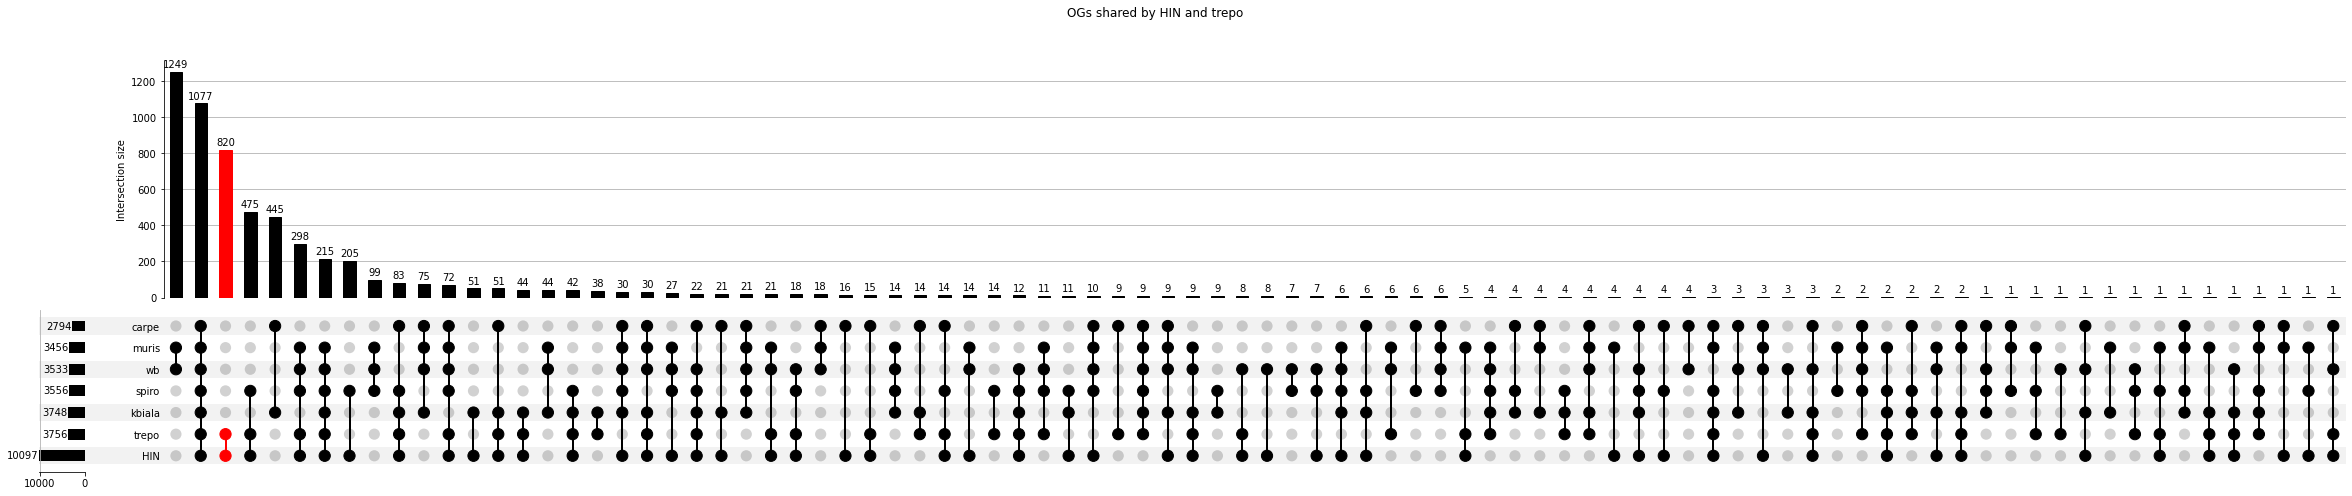

In [2]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

"OG with at least two genes"
df_count = pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"

"Upset plot for only OG, singletons are excluded"
df_stack_cn = df_count.set_index(df_count.HIN >= 1).\
    set_index(df_count.spiro >= 1, append=True).\
    set_index(df_count.wb >= 1, append=True).\
    set_index(df_count.muris >= 1, append=True).\
    set_index(df_count.trepo >= 1, append=True).\
    set_index(df_count.kbiala >= 1, append=True).\
    set_index(df_count.carpe >= 1, append=True)

upset = UpSet(df_stack_cn,
              intersection_plot_elements=10,
              min_degree=2,
              show_counts=True,
              sort_categories_by="cardinality",
              sort_by="cardinality")


upset.style_subsets(absent=["kbiala", "carpe", "spiro", "wb", "muris"],
                facecolor="red")

upset.plot()
plt.suptitle("OGs shared by HIN and trepo")
plt.show()

## Extract genes from OGs

In [3]:
"OG shared by HIN and trepo"
df=pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df=df[["Orthogroup","HIN", "trepo", "spiro", "wb", "muris", "kbiala", "carpe", "Total"]]

og_hin_trepo = df[(df.iloc[:,[1,2]] >=1).all(1)  & (df.iloc[:,[3,4,5,6,7]] ==0).all(1)]

print("Number of OGs= ", len(og_hin_trepo["Orthogroup"]))
print("Total trepo genes =", og_hin_trepo["trepo"].sum())
print("Total HIN genes =", og_hin_trepo["HIN"].sum())

og_hin_trepo.head()

Number of OGs=  820
Total trepo genes = 1070
Total HIN genes = 5308


,Orthogroup,HIN,trepo,spiro,wb,muris,kbiala,carpe,Total
4,OG0000004,511,1,0,0,0,0,0,512
23,OG0000023,251,1,0,0,0,0,0,252
59,OG0000059,123,1,0,0,0,0,0,124
102,OG0000102,86,1,0,0,0,0,0,87
128,OG0000128,73,1,0,0,0,0,0,74


In [4]:
"OG gene list"
OG_gene_list = pd.read_csv('/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.txt', header=None, dtype=str, delim_whitespace=True)
OG_gene_list = OG_gene_list.apply(lambda x: x.str.replace(":", ""))

"extract proteins from OG"
def extract_prot(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").set_index(0)
    return df.T

extract_prot(og_hin_trepo).head()

,OG0000004,OG0000023,OG0000059,OG0000102,OG0000128,OG0000196,OG0000204,OG0000242,OG0000247,OG0000266,...,OG0011087,OG0011089,OG0011220,OG0011477,OG0011539,OG0011561,OG0011948,OG0011999,OG0012032,OG0012096
1,HIN_000231,HIN_000578,HIN_000013,HIN_003399,HIN_006645,HIN_005974,HIN_000117,HIN_000009,HIN_002237,HIN_000532,...,HIN_003810,HIN_003959,HIN_010209,HIN_024132,HIN_030568,HIN_031999,HIN_066393,HIN_071741,HIN_075944,HIN_086297
2,HIN_000254,HIN_000728,HIN_000833,HIN_004589,HIN_009425,HIN_005975,HIN_000139,HIN_002681,HIN_002241,HIN_000533,...,TPC1_13645,TPC1_15240,TPC1_10655,TPC1_20131,TPC1_30670,TPC1_17531,TPC1_30637,TPC1_13279,TPC1_12200,TPC1_17826
3,HIN_000347,HIN_000734,HIN_001354,HIN_004605,HIN_009446,HIN_007056,HIN_000183,HIN_002704,HIN_005533,HIN_000551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HIN_000529,HIN_000736,HIN_003469,HIN_004607,HIN_014024,HIN_009466,HIN_009140,HIN_013515,HIN_005547,HIN_002328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,HIN_000530,HIN_000740,HIN_004966,HIN_008568,HIN_016905,HIN_009486,HIN_009222,HIN_022398,HIN_015215,HIN_002329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
extract_prot(og_hin_trepo).to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_hin_trepo.csv", header="infer", index=False, sep="\t")

## add annotation

In [5]:
## add annotation
import glob

"OG diplo subset gene list with annotations"


def OG_stack(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").rename(columns={0: "OG"}).set_index("OG")
    df = df.stack().reset_index().drop(columns=["level_1"])
    return df

df_og_stack = OG_stack(og_hin_trepo)

"Add annotations"
path = '/Users/zeyku390/PycharmProjects/H.inflata/jupyter/data/*.csv'
list_files = glob.glob(path)

#get species name from the filenames
sp_dic = {}
for element in list_files:
    i = element.split("_annot")[0]
    i = i.split("/")[-1]
    sp_dic[i] = element

dic_annot = {}
for key, value in sp_dic.items():
    dic_annot[key] = pd.read_csv(value, sep="\t", header="infer")


def add_annot(df, df_annot):
    df = pd.merge(df, df_annot, right_on="id", left_on=0, how="left").drop(columns=[0]).dropna()
    return df


df1 = add_annot(OG_stack(og_hin_trepo), dic_annot["HIN"])
df2 = add_annot(OG_stack(og_hin_trepo), dic_annot["trepo"])

df_og_stack_annot = pd.concat([df1, df2], axis=0)
df_og_stack_annot

,OG,id,desc
0,OG0000004,HIN_000231,HIN_000231 Transposase IS4
1,OG0000004,HIN_000254,HIN_000254 Hypothetical protein
2,OG0000004,HIN_000347,HIN_000347 Hypothetical protein
3,OG0000004,HIN_000529,HIN_000529 Transposase IS4
4,OG0000004,HIN_000530,HIN_000530 Hypothetical protein
...,...,...,...
6369,OG0011561,TPC1_17531,"TPC1_17531 L-fucose isomerase, C-terminal doma..."
6371,OG0011948,TPC1_30637,TPC1_30637 Hypothetical protein
6373,OG0011999,TPC1_13279,TPC1_13279 DDE superfamily endonuclease domain...
6375,OG0012032,TPC1_12200,TPC1_12200 AMP-binding enzyme


In [ ]:
df_og_stack_annot.to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_hin_trepo_annot.csv",
                         sep="\t", header="infer", index=False)

## add interproscan annotation

In [6]:
import pandas as pd
import glob

"OG diplo subset gene list with annotations"
def OG_stack(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").rename(columns={0:"OG"}).set_index("OG")
    df=df.stack().reset_index().drop(columns=["level_1"])
    return df

df_og_stack=OG_stack(og_hin_trepo)

path = '/Users/zeyku390/PycharmProjects/H.inflata/resource/3_interproscan/*.tsv'
list_files = glob.glob(path)

#get species name from the filenames
sp_dic = {}
for element in list_files:
    i = element.split(".")[1]
    i = i.split("/")[-1]
    sp_dic[i] = element

dic_annot= {}
for key, value in sp_dic.items():
    dic_annot[key] = pd.read_csv(value, sep="\t", header=None, names=list(range(0, 15)),
                           engine='python', quoting=3)


def add_annot(df, df_annot):
    df=pd.merge(df, df_annot, on=0)
    return df

df1=add_annot(OG_stack(og_hin_trepo), dic_annot["HIN"])
df2=add_annot(OG_stack(og_hin_trepo), dic_annot["spiro"])
df3=add_annot(OG_stack(og_hin_trepo), dic_annot["muris"])
df4=add_annot(OG_stack(og_hin_trepo), dic_annot["wb"])
df5=add_annot(OG_stack(og_hin_trepo), dic_annot["trepo"])

df_og_stack_ipr=pd.concat([df1,df2,df3,df4,df5], axis=0)
df_og_stack_ipr

,OG,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,OG0000004,HIN_000231,ebcde8dbef0d685738cf33504976e3e4,204,Pfam,PF13843,Transposase IS4,12,88,4.0E-8,T,13-10-2020,IPR029526,PiggyBac transposable element-derived protein,NaN,NaN
1,OG0000004,HIN_000347,9706b9e30bc2840f6b4173d865f30d5c,200,Coils,Coil,Coil,135,155,-,T,13-10-2020,None,None,None,None
2,OG0000004,HIN_000529,c3b943bdcb9b0cd5389ec39da372e33b,181,Pfam,PF13843,Transposase IS4,9,64,1.9E-6,T,13-10-2020,IPR029526,PiggyBac transposable element-derived protein,NaN,NaN
3,OG0000004,HIN_000821,ad849a2786ec061320e0dfb00c005be7,345,Coils,Coil,Coil,135,155,-,T,13-10-2020,None,None,None,None
4,OG0000004,HIN_000821,ad849a2786ec061320e0dfb00c005be7,345,Pfam,PF13843,Transposase IS4,178,315,2.9E-8,T,13-10-2020,IPR029526,PiggyBac transposable element-derived protein,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,OG0012032,TPC1_12200,e08fab1e4d2c1e98c2326f498aa30004,132,CDD,cd05927,LC-FACS_euk,1,86,6.00563E-13,T,20-10-2022,None,None,None,None
3771,OG0012096,TPC1_17826,5de919e976f9a51e187656cde40bf90d,151,Gene3D,G3DSA:1.10.510.10,Transferase(Phosphotransferase) domain 1,2,109,4.9E-12,T,20-10-2022,None,None,None,None
3772,OG0012096,TPC1_17826,5de919e976f9a51e187656cde40bf90d,151,ProSiteProfiles,PS50011,Protein kinase domain profile.,1,95,9.051,T,20-10-2022,IPR000719,Protein kinase domain,GO:0004672|GO:0005524|GO:0006468,NaN
3773,OG0012096,TPC1_17826,5de919e976f9a51e187656cde40bf90d,151,SUPERFAMILY,SSF56112,Protein kinase-like (PK-like),3,89,5.94E-11,T,20-10-2022,IPR011009,Protein kinase-like domain superfamily,NaN,NaN


In [7]:
df_og_stack_ipr.drop(columns="OG").to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_hin_trepo_ipr.csv",sep="\t", header="infer", index=False)

## add eggnog annotation

In [8]:
df_og_stack=OG_stack(og_hin_trepo)

path = '/Users/zeyku390/PycharmProjects/H.inflata/resource/4_eggnog/eggnog/*.annotations'
list_files = glob.glob(path)

#get species name from the filenames
sp_dic = {}
for element in list_files:
    i = element.split(".")[1]
    i = i.split("/")[-1]
    sp_dic[i] = element

dic_annot= {}
for key, value in sp_dic.items():
    dic_annot[key] = pd.read_csv(value, sep="\t",  header="infer", skiprows=3)


def add_annot(df, df_annot):
    df=pd.merge(df, df_annot,right_on="#query_name",left_on=0 )
    return df

df1=add_annot(OG_stack(og_hin_trepo), dic_annot["HIN_NOG"])
df2=add_annot(OG_stack(og_hin_trepo), dic_annot["spiro_NOG"])
df3=add_annot(OG_stack(og_hin_trepo), dic_annot["muris_NOG"])
df4=add_annot(OG_stack(og_hin_trepo), dic_annot["wb_NOG"])
df5=add_annot(OG_stack(og_hin_trepo), dic_annot["trepo_NOG"])

df_og_stack_egg=pd.concat([df1,df2,df3,df4,df5], axis=0)
df_og_stack_egg

,OG,0,#query_name,seed_eggNOG_ortholog,seed_ortholog_evalue,seed_ortholog_score,best_tax_level,Preferred_name,GOs,EC,...,eggNOG free text desc.,predicted_gene_name,GO_terms,KEGG_KOs,BiGG_reactions,Annotation_tax_scope,OGs,bestOG|evalue|score,COG cat,eggNOG annot
0,OG0000004,HIN_001345,HIN_001345,7029.ACYPI066025-PA,2.200000e-07,63.2,Insecta,NaN,NaN,NaN,...,Transposase IS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OG0000004,HIN_004340,HIN_004340,7029.ACYPI066025-PA,2.500000e-11,76.6,Insecta,NaN,NaN,NaN,...,Transposase IS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OG0000004,HIN_005186,HIN_005186,7029.ACYPI066025-PA,1.700000e-07,63.2,Insecta,NaN,NaN,NaN,...,Transposase IS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OG0000004,HIN_006782,HIN_006782,7029.ACYPI066025-PA,2.100000e-10,72.8,Insecta,NaN,NaN,NaN,...,Transposase IS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OG0000004,HIN_009301,HIN_009301,7029.ACYPI066025-PA,2.200000e-07,63.2,Insecta,NaN,NaN,NaN,...,Transposase IS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,OG0010086,TPC1_14643,TPC1_14643,313612.L8106_10046,1.400000e-15,89.7,NaN,NaN,NaN,NaN,...,NaN,SFUM_3007,NaN,K13730,NaN,bactNOG[38],"08NJY@bactNOG,COG4886@NOG",NA|NA|NA,M,Repeat protein
421,OG0011087,TPC1_13645,TPC1_13645,762550.LEGAS_0271,5.000000e-11,73.2,NaN,NaN,NaN,NaN,...,NaN,ARAT,NaN,K08139,NaN,bactNOG[38],"04R93@bacNOG,07QNK@bactNOG,0ND7W@firmNOG,0XNQK...",NA|NA|NA,G,-transporter
422,OG0011561,TPC1_17531,TPC1_17531,391623.TERMP_00182,1.200000e-31,142.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,arNOG[11],"0KWVR@eurNOG,COG2407@NOG,arCOG01772@arNOG",NA|NA|NA,G,Inherit from arCOG: L-fucose isomerase
423,OG0011999,TPC1_13279,TPC1_13279,653948.CCA18152,3.000000e-09,66.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,euNOG[57],"0J6BJ@euNOG,11KH4@NOG",NA|NA|NA,S,to transposase-like Hydra magnipapillata


## Summary Annotation

In [9]:
df_sum=pd.merge(df_og_stack_annot,df_og_stack_ipr, right_on=[0, "OG"], left_on=["id", "OG"])
df_sum=pd.merge(df_sum,df_og_stack_egg, on=[0, "OG"])
df_sum[["OG", 0, "desc", 5, 11,12, "EC", "COG cat", "eggNOG annot"]]

,OG,0,desc,5,11,12,EC,COG cat,eggNOG annot
0,OG0000004,HIN_001345,HIN_001345 Transposase IS4,Coil,None,None,NaN,NaN,NaN
1,OG0000004,HIN_001345,HIN_001345 Transposase IS4,Transposase IS4,IPR029526,PiggyBac transposable element-derived protein,NaN,NaN,NaN
2,OG0000004,HIN_004340,HIN_004340 Transposase IS4,Transposase IS4,IPR029526,PiggyBac transposable element-derived protein,NaN,NaN,NaN
3,OG0000004,HIN_004340,HIN_004340 Transposase IS4,PIGGYBAC TRANSPOSABLE ELEMENT-DERIVED PROTEIN 4,None,None,NaN,NaN,NaN
4,OG0000004,HIN_005186,HIN_005186 Transposase IS4,Transposase IS4,IPR029526,PiggyBac transposable element-derived protein,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9643,OG0011561,TPC1_17531,"TPC1_17531 L-fucose isomerase, C-terminal doma...",Coil,None,None,NaN,G,Inherit from arCOG: L-fucose isomerase
9644,OG0011561,TPC1_17531,"TPC1_17531 L-fucose isomerase, C-terminal doma...",-,None,None,NaN,G,Inherit from arCOG: L-fucose isomerase
9645,OG0011999,TPC1_13279,TPC1_13279 DDE superfamily endonuclease domain...,TRANSPOSABLE ELEMENT-RELATED,None,None,NaN,S,to transposase-like Hydra magnipapillata
9646,OG0011999,TPC1_13279,TPC1_13279 DDE superfamily endonuclease domain...,-,None,None,NaN,S,to transposase-like Hydra magnipapillata
